## Makkan Properties Price Analysis 

### Import Packages

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

### Functions

In [2]:
def read_data(path):
    return pd.read_csv(path,  encoding='cp1252')

def separator(n=50):
    print("-"*n)
    
### Function to remove spaces
def remove(string):
    return string.replace(" ", "")

### print the values in the datsets
def print_df(dataset,dataset_name):
    print(dataset_name,"..\n")
    print(dataset.head())
    separator()
    
### function to print the data types and info of the data set
def datatypes_info(dataset,dataset_name):
    print("Data types of ",dataset_name ,"data set...\n")
    print(dataset.dtypes)
    separator()
    print("INFO of ",dataset_name ,"data set...\n")
    print(dataset.info())
    separator()

### function for printing number of unique elements and unique values in columns 
def unique_ele(data,col):
    for c in col:
        print("The number of unique elements in column",c,data[c].nunique())
        print("The unique values in column",c,data[c].unique())
        print("The values counts of columns",c)
        print(data[c].value_counts())
        separator(75)
        
### Function to print the shape
def shape(data,dataset_name):
    print("Shape of the dataset ",dataset_name,"....",data.shape)
    separator()
    
###Function to treat outliers
def treat_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)
    for i in range(0,len(data)):
        if (data[i]>upper) or (data[i]<lower):
            if (data[i]>upper):
                data[i] = upper
            elif (data[i]<lower):
                data[i]=lower
    return data


### Data Preparation

In [33]:
### store data from system to the variable
property_details=read_data('H:/COLLEGE WORKS/DATA SCIENCE/Top Mentors/Materials/Project/Makkan Properties Analysis/Makaan_Properties_Details.csv')

###print the shape of the data set property_details
shape(property_details,"property_details")


### store data from system to the variable
property_location_details=read_data('H:/COLLEGE WORKS/DATA SCIENCE/Top Mentors/Materials/Project/Makkan Properties Analysis/Makaan_property_location_details.csv')

###Print the shape of then datsets property_location_details
shape(property_location_details,"property_location_details")


### Change the column name in property location details 
property_location_details.rename(columns={'ï»¿Property_id':'Property_id'},inplace=True)

### merge the two data sets 
property_data = pd.merge(property_details,property_location_details, on=['Property_id'])

###Print the shape of then datsets property_data
shape(property_data,"property_data")

Shape of the dataset  property_details .... (332096, 24)
--------------------------------------------------
Shape of the dataset  property_location_details .... (332096, 9)
--------------------------------------------------
Shape of the dataset  property_data .... (4942704, 32)
--------------------------------------------------


### Data Analysis

In [34]:
### print the values in the datsets property_details
print_df(property_details,"property_details")

###print the data types and info of the data set property_details
datatypes_info(property_details,"property_details")

### print the unique elements and their counts of the data set property_details
property_details_col = property_details.columns
unique_ele(property_details,property_details_col)

separator(100)

### print the values in the datsets property_location_details
print_df(property_location_details,"property_location_details")

###print the data types and info of the data set property_location_details
datatypes_info(property_location_details,"property_location_details")

### print the unique elements and their counts of the data set property_location_details
property_location_details_col = property_location_details.columns
unique_ele(property_location_details,property_location_details_col)

separator(100)

### print the values in the datsets property_data
print_df(property_data,"property_data")

###print the data types and info of the data set property_data
datatypes_info(property_data,"property_data")

### print the unique elements and their counts of the data set property_data
property_data_col = property_details.columns
unique_ele(property_data,property_data_col)

separator(100)

property_details ..

               Property_Name  Property_id Property_type     Property_status  \
0               Arkiton Luxe     15446514     Apartment  Under Construction   
1  Keshav Akshar Ocean Pearl     15367414     Apartment  Under Construction   
2            Vishwa Opulence     14683118     Apartment       Ready to move   
3              Satyam Sarjan      5476295     Apartment       Ready to move   
4           Navkar Sunflower     15477040     Apartment  Under Construction   

   Price_per_unit_area   Posted_On  \
0                 4285   1 day ago   
1                 7000  2 days ago   
2                 5752  2 days ago   
3                 2486  5 days ago   
4                 5324  8 days ago   

                                         Project_URL   builder_id  \
0  https://www.makaan.com/ahmedabad/arkiton-life-...  100563465.0   
1  https://www.makaan.com/ahmedabad/keshav-naraya...  100009433.0   
2  https://www.makaan.com/ahmedabad/vishwa-develo...  100207731.0   

### Data Pre-Processing

In [36]:
### Check duplicates
print("Number of duplicated values before removing duplicates are: ",property_data.duplicated().sum())
### Removing the duplicated values
property_data.drop_duplicates(inplace=True)

print("Number of duplicated values After removing duplicates are: ",property_data.duplicated().sum())
separator()

#### Check null
print("Number of null values in each column in property data before treating")
print(property_data.isnull().sum())

Number of duplicated values before removing duplicates are:  0
Number of duplicated values After removing duplicates are:  0
--------------------------------------------------
Number of null values in each column in property data before treating
Property_Name               224036
Property_id                      0
Property_type                    0
Property_status              71678
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  294302
Builder_name                294302
Property_building_status         0
No_of_BHK                        0
Price                            0
Size                             0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_commercial_Listing            0
is_PentaHouse      

In [37]:
### Treat Null
property_data['Property_Name'].fillna("No Property Name",inplace= True)
property_data['Property_status'].fillna("No Property Status",inplace= True)
property_data['builder_id'].fillna(0,inplace= True)
property_data['Builder_name'].fillna("No Bulider Name",inplace= True)
property_data['description'].fillna("No Description",inplace= True)
property_data['Locality_Name'].fillna("No Locality Name",inplace= True)
print("Number of null values in each column in property data after treating ")
print(property_data.isnull().sum())

Number of null values in each column in property data after treating 
Property_Name               0
Property_id                 0
Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Project_URL                 0
builder_id                  0
Builder_name                0
Property_building_status    0
No_of_BHK                   0
Price                       0
Size                        0
description                 0
is_furnished                0
listing_domain_score        0
is_plot                     0
is_RERA_registered          0
is_Apartment                0
is_ready_to_move            0
is_commercial_Listing       0
is_PentaHouse               0
is_studio                   0
Listing_Category            0
City_id                     0
City_name                   0
Locality_ID                 0
Locality_Name               0
Longitude                   0
Latitude                    0
Sub_urban_ID                0


In [38]:
property_data.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area           int64
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
No_of_BHK                    object
Price                         int64
Size                          int64
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move               bool
is_commercial_Listing          bool
is_PentaHouse                  bool
is_studio                      bool
Listing_Category             object
City_id                       int64
City_name                    object
Locality_ID                   int64
Locality_Name               

In [45]:
### remove unwanted columns
property_df = property_data.drop(columns=['Property_id','Project_URL','builder_id','description','City_id','Locality_ID','Sub_urban_ID'],axis=1)
print(property_df.head())

                Property_Name Property_type     Property_status  \
0                Arkiton Luxe     Apartment  Under Construction   
3                Arkiton Luxe     Apartment  Under Construction   
6                Arkiton Luxe     Apartment  Under Construction   
9   Keshav Akshar Ocean Pearl     Apartment  Under Construction   
12  Keshav Akshar Ocean Pearl     Apartment  Under Construction   

    Price_per_unit_area    Posted_On          Builder_name  \
0                  4285    1 day ago    Arkiton life Space   
3                  4285  a month ago    Arkiton life Space   
6                  3600  a month ago    Arkiton life Space   
9                  7000   2 days ago  Keshav Narayan Group   
12                 7000   4 days ago  Keshav Narayan Group   

   Property_building_status No_of_BHK     Price  Size  ... is_ready_to_move  \
0                    ACTIVE     3 BHK   7500000  1750  ...            False   
3                    ACTIVE     3 BHK   7500000  1750  ...        

In [54]:
### Encoding of data
d = defaultdict(LabelEncoder)
# Encoding the variable
propert_df = property_df.apply(lambda lb: d[lb.name].fit_transform(lb))

# Inverse the encoded
#propert_df = propert_df.apply(lambda lb: d[lb.name].inverse_transform(lb))
# Using the dictionary to label future data
#fit = fit.apply(lambda lb: d[lb.name].inverse_transform(lb))
#fit
propert_df


,Property_Name,Property_type,Property_status,Price_per_unit_area,Posted_On,Builder_name,Property_building_status,No_of_BHK,Price,Size,...,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,City_name,Locality_Name,Longitude,Latitude,Sub_urban_name
0,2600,0,2,3965,0,689,0,10,27474,1620,...,0,0,0,0,0,0,711,344,41430,4
3,2600,0,2,3965,81,689,0,10,27474,1620,...,0,0,0,0,0,0,711,344,41430,4
6,2600,0,2,3280,81,689,0,10,23556,1620,...,0,0,0,0,0,0,711,344,41430,4
9,12783,0,2,6680,24,3310,0,12,41378,3117,...,0,0,0,0,0,0,169,579,41186,4
12,12783,0,2,6680,57,3310,0,12,41378,3117,...,0,0,0,0,0,0,169,579,41186,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942699,20105,0,2,9480,59,5438,0,1,11532,216,...,0,0,0,0,0,7,4656,6160,35147,58
4942700,20105,0,2,8244,59,5438,0,1,12732,296,...,0,0,0,0,0,7,4656,6160,35147,58
4942701,20105,0,2,9514,59,5438,0,1,12205,230,...,0,0,0,0,0,7,4656,6160,35147,58
4942702,20105,0,2,8488,59,5438,0,8,19418,460,...,0,0,0,0,0,7,4656,6160,35147,58


In [57]:
### Correlation to determine the independent columns
propert_df.corr()['Price']

Property_Name              -0.010370
Property_type              -0.447736
Property_status             0.383956
Price_per_unit_area         0.819719
Posted_On                   0.006765
Builder_name               -0.030121
Property_building_status   -0.245079
No_of_BHK                   0.704559
Price                       1.000000
Size                        0.446701
is_furnished               -0.342689
listing_domain_score       -0.005931
is_plot                    -0.608518
is_RERA_registered          0.155765
is_Apartment                0.279641
is_ready_to_move            0.227958
is_commercial_Listing            NaN
is_PentaHouse               0.020276
is_studio                  -0.063923
Listing_Category                 NaN
City_name                  -0.078273
Locality_Name               0.058569
Longitude                  -0.474786
Latitude                    0.061629
Sub_urban_name              0.011923
Name: Price, dtype: float64

In [58]:
y = propert_df['Price']
x = propert_df[['Property_type','Property_status','Price_per_unit_area','Property_building_status','No_of_BHK','Size','is_furnished','is_plot','is_RERA_registered','is_Apartment','is_ready_to_move','Longitude']]

print("Independent Datasets - X")
print(x)
separator()

print("Dependent Datasets - Y")
print(y)

Independent Datasets - X
         Property_type  Property_status  Price_per_unit_area  \
0                    0                2                 3965   
3                    0                2                 3965   
6                    0                2                 3280   
9                    0                2                 6680   
12                   0                2                 6680   
...                ...              ...                  ...   
4942699              0                2                 9480   
4942700              0                2                 8244   
4942701              0                2                 9514   
4942702              0                2                 8488   
4942703              0                2                 9512   

         Property_building_status  No_of_BHK  Size  is_furnished  is_plot  \
0                               0         10  1620             2        0   
3                               0         10  1620  

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Accuracy of Linear Regression Model is 85.06883715571631


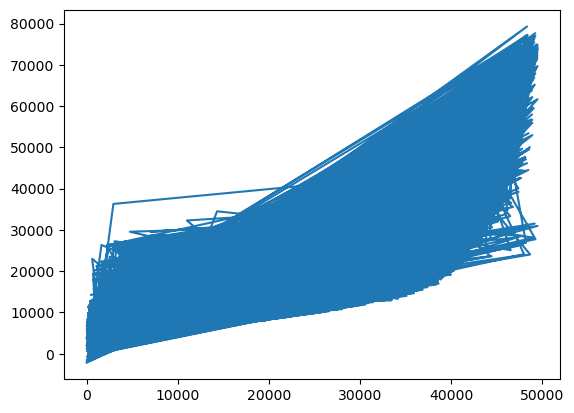

In [60]:
### Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_pred = linear_model.predict(x_test)
#linear_pred
print("Accuracy of Linear Regression Model is", r2_score(y_test,linear_pred)*100)
plt.plot(y_test,linear_pred)
plt.show()

Accuracy of Lasso Regression Model is 85.06885681664589


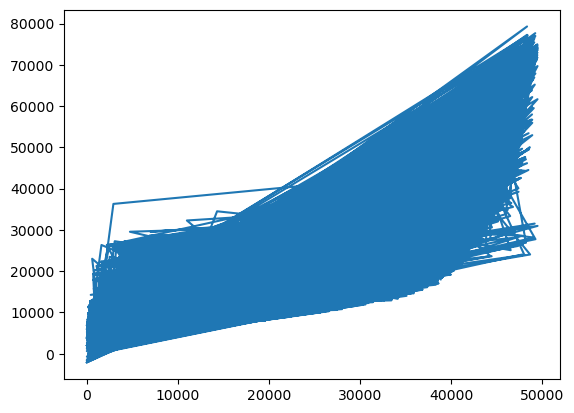

In [61]:
### Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
lasso_pred = lasso_model.predict(x_test)
#lasso_pred
print("Accuracy of Lasso Regression Model is", r2_score(y_test,lasso_pred)*100)
plt.plot(y_test,lasso_pred)
plt.show()

Accuracy of Ridge Regression Model is 85.06883814502896


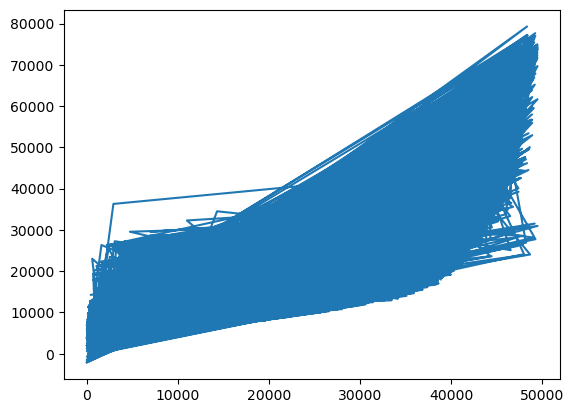

In [62]:
### Ridge Regression
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_pred
print("Accuracy of Ridge Regression Model is", r2_score(y_test,ridge_pred)*100)
plt.plot(y_test,ridge_pred)
plt.show()

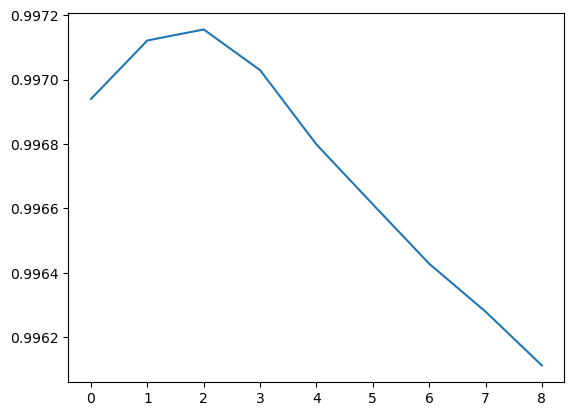

Accuracy of KNN Regression Model is 99.71212692654693


In [ ]:
### Knn Regression
error = []
for i in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    knn_pred = knn_model.predict(x_test)
    error.append(r2_score(y_test,knn_pred))
plt.plot(error)
plt.show()
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)
print("Accuracy of KNN Regression Model is", r2_score(y_test,knn_pred)*100)
plt.plot(y_test,knn_pred)
plt.show()